# Indrodução
Neste projeto vamos utilizar um algoritimo para efetuar a remoção de ruído em uma imagem.

## Importanto as bibliotecas necessárias.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Algoritimo para remoção de ruídos
Estamos utilizando o Filtro Gaussiano para tratamento de ruídos na imagem.

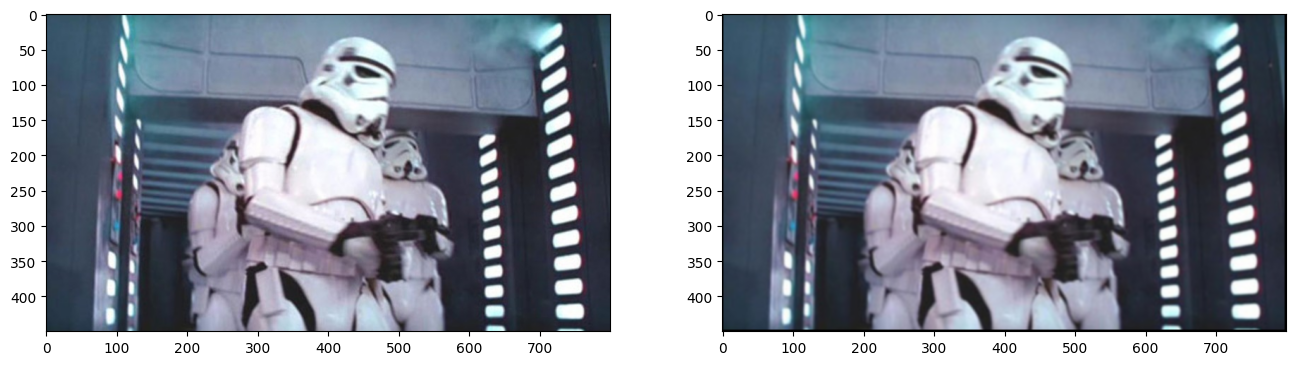

In [21]:
def gaussian_filter(image, kernel_size, sigma):
    height, width, channels = image.shape
    smoothed = np.zeros_like(image)

    # Calcula o deslocamento do kernel
    offset = kernel_size // 2

    # Cria o kernel gaussiano
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) * np.exp(-((x - offset) ** 2 + (y - offset) ** 2) / (2 * sigma ** 2)),
        (kernel_size, kernel_size)
    )
    kernel /= np.sum(kernel)

    # Aplica o filtro gaussiano em cada canal de cor
    for c in range(channels):
        for i in range(offset, height - offset):
            for j in range(offset, width - offset):
                patch = image[i - offset:i + offset + 1, j - offset:j + offset + 1, c]
                smoothed[i, j, c] = np.sum(patch * kernel)

    return smoothed

# Exemplo de uso
star_wars = plt.imread('star_wars.png')  # Lê a imagem (assegure-se de ter a biblioteca Matplotlib instalada)

smoothed_star_wars = gaussian_filter(star_wars, 5, 1.0)  # Aplica o filtro gaussiano

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1) #(nrows,ncol,index)
plt.imshow(star_wars)
plt.subplot(2, 2, 2)
plt.imshow(smoothed_star_wars)